In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset file

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the null count values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Calculate the percentage of null values in each column

null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#Checking for the column having null values more than 40%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>40]

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [9]:
# Loop through each column and print unique values
for column in lead_df.columns:
    unique_values = lead_df[column].unique()
    print(f"{column}: {unique_values}")

Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Number: [660737 660728 660727 ... 579545 579538 579533]
Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email: ['No' 'Yes']
Do Not Call: ['No' 'Yes']
Converted: [0 1]
TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251

In [10]:
for column in lead_df.columns:
    unique_count = lead_df[column].nunique()
    print(f"{column}: {unique_count}")

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 41
Total Time Spent on Website: 1731
Page Views Per Visit: 114
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
Asymmetrique Activity Score: 12
Asymmetrique Profile Score: 10
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [11]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA

In [12]:
#Taking the list of the columns having null values more than 40%
null_values_list = null_percentage[null_percentage>40].index.tolist()

In [13]:
# Dropping the column having null values more than 40%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [14]:
lead_df.shape

(9240, 32)

In [15]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

In [18]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
search_columns = lead_df.columns[16:22]
search_columns

Index(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement'],
      dtype='object')

In [20]:
# Dropping Search columns and related fields as it has an extreme dataimbalance.
lead_df.drop(search_columns, axis = 1, inplace = True)

In [21]:
lead_df.shape

(9240, 26)

In [22]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

##### Below are the columns which either has data imbalance or the field is does not relevent with respect to analysis, therefore dropping these columns
- Do not Email
- Lead Source
- Prospect ID
- Lead Number
- What matters most to you in choosing a course
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [23]:
drop_columns = ['Do Not Call','Do Not Email','Lead Source','Prospect ID','Lead Number','What matters most to you in choosing a course','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [24]:
# Dropping drop columns 
lead_df.drop(drop_columns, axis = 1, inplace = True)

In [25]:
lead_df.shape

(9240, 15)

In [26]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
0    0.61461
1    0.38539
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0    

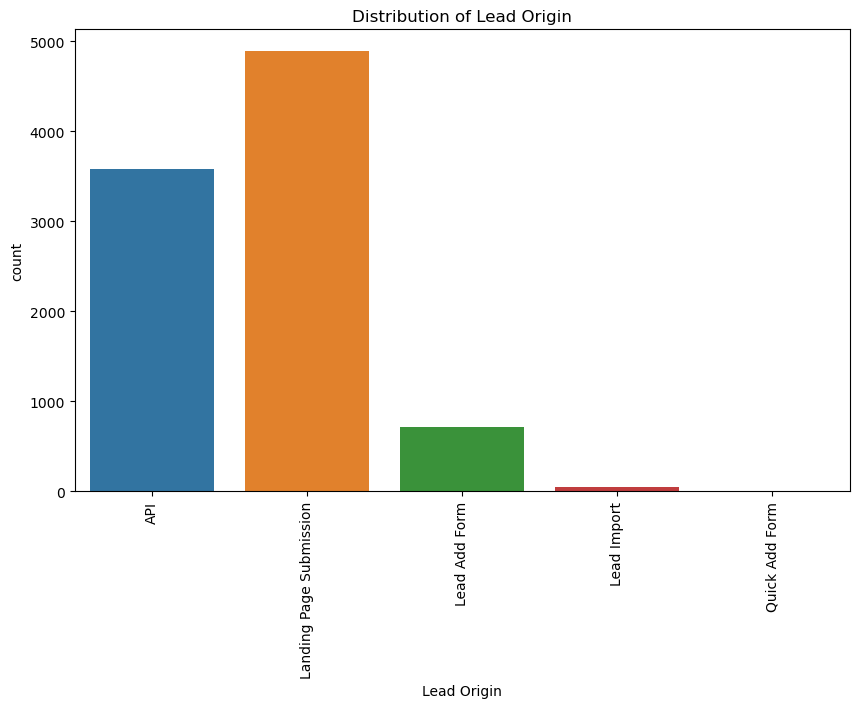

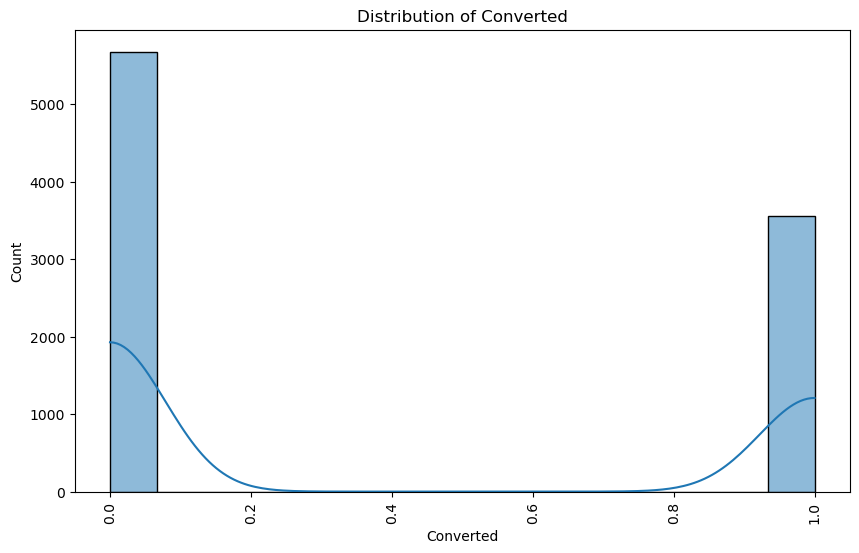

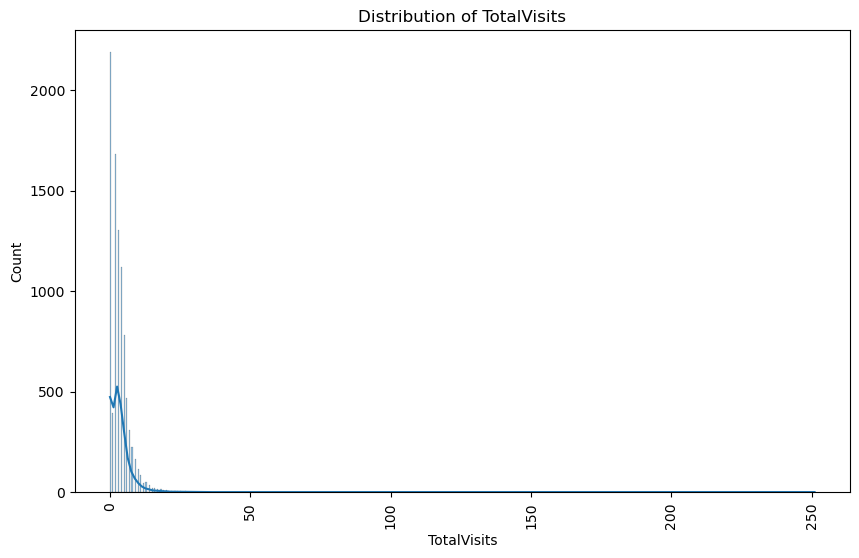

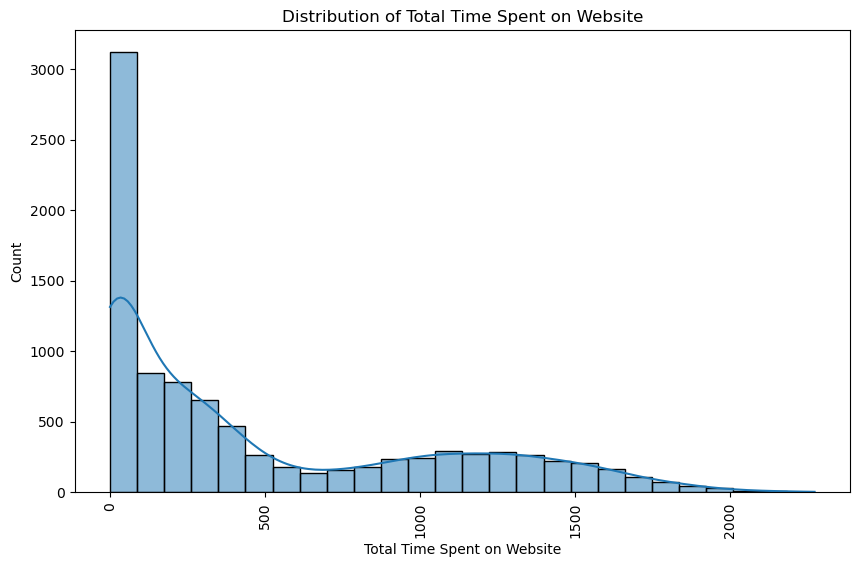

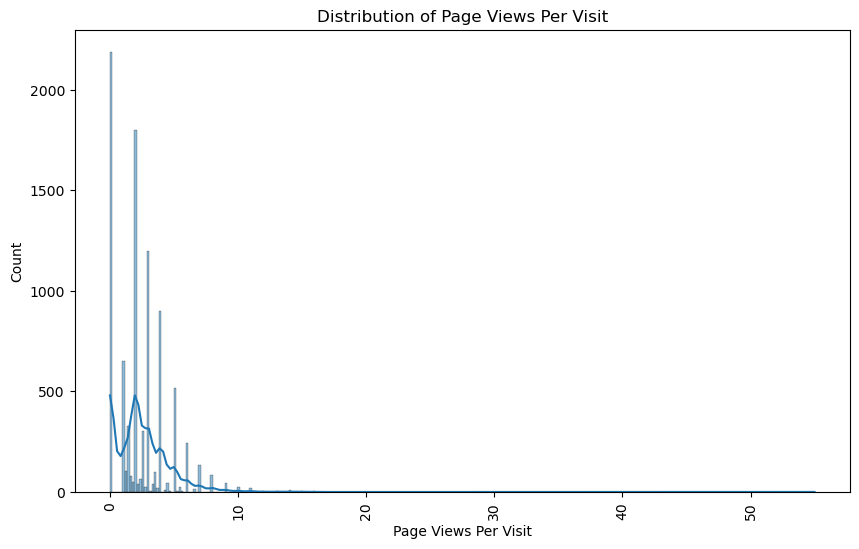

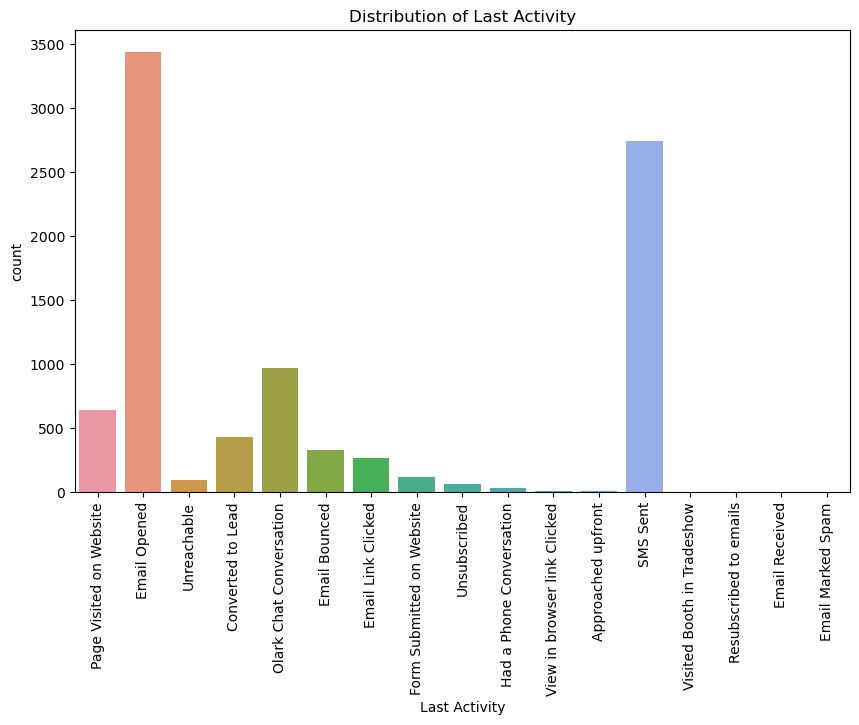

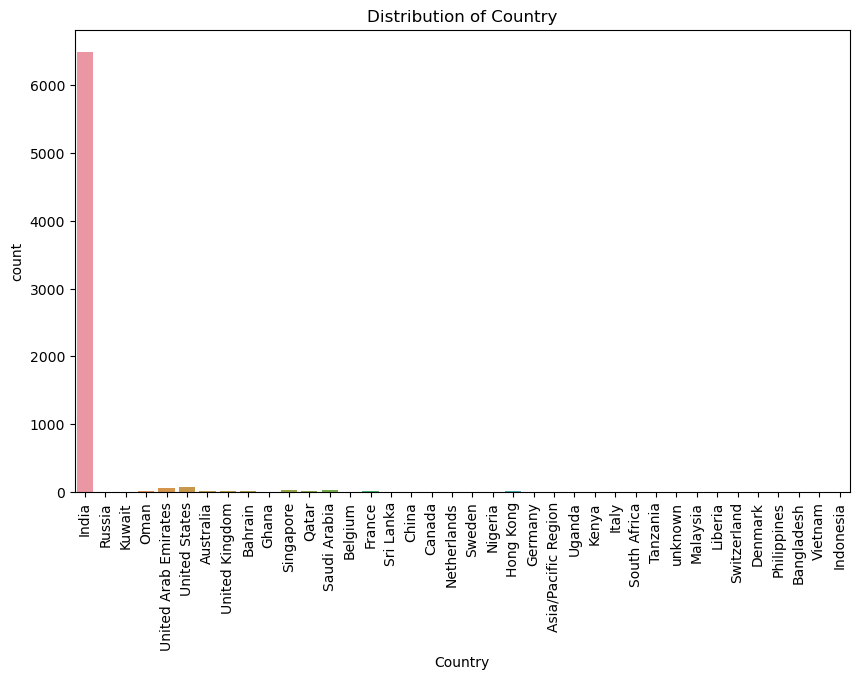

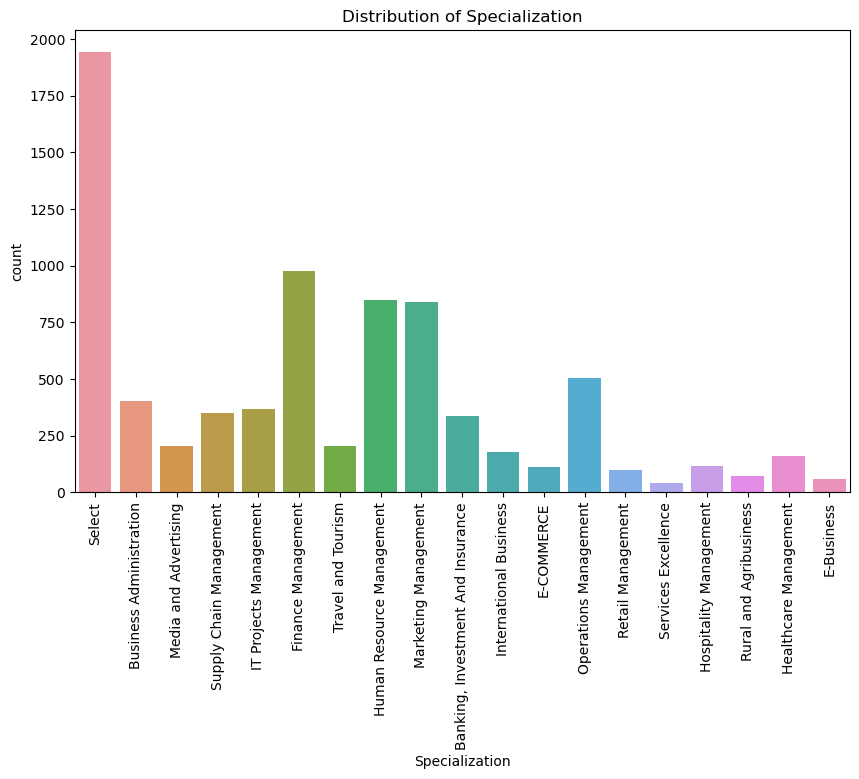

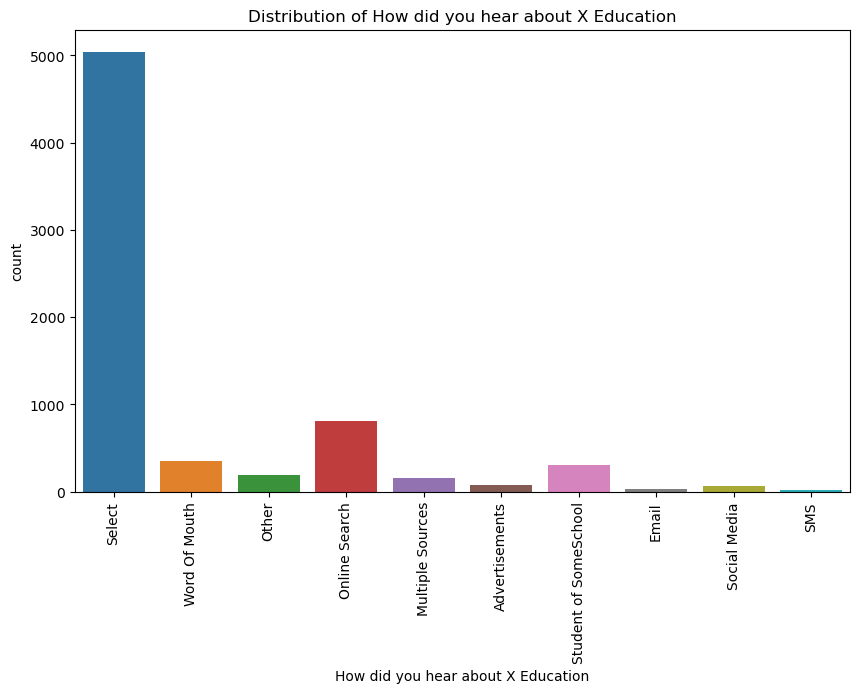

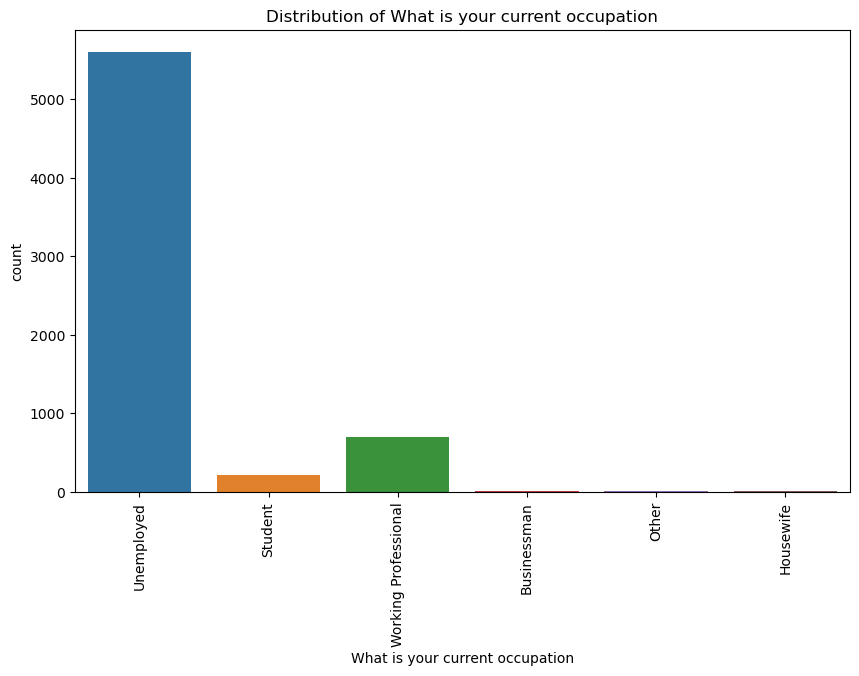

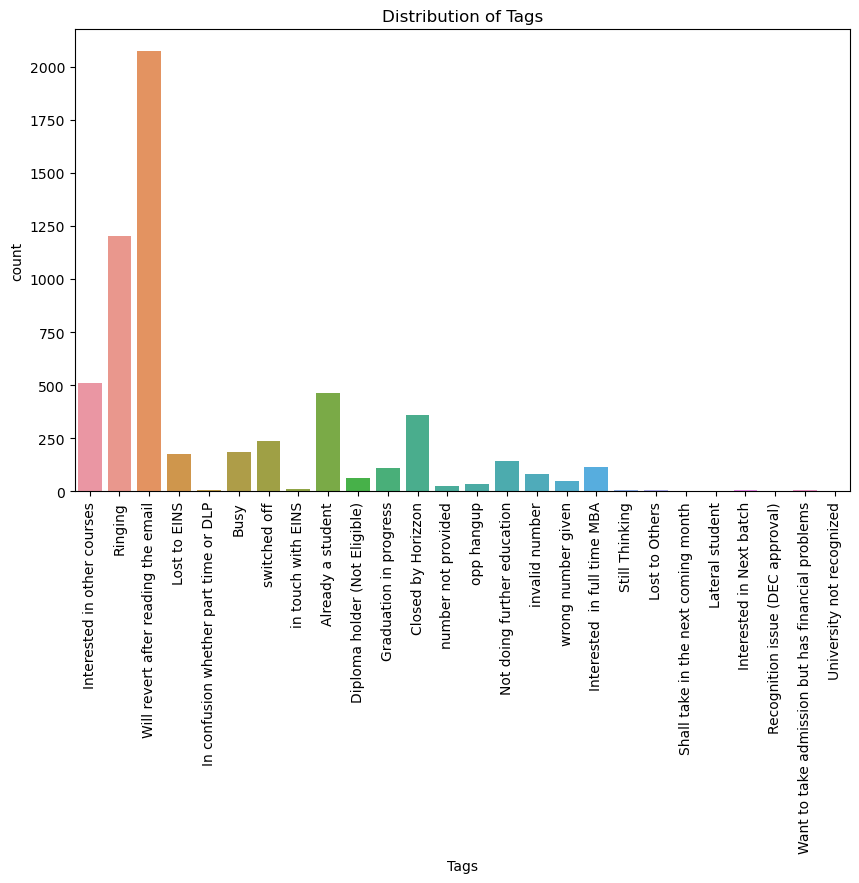

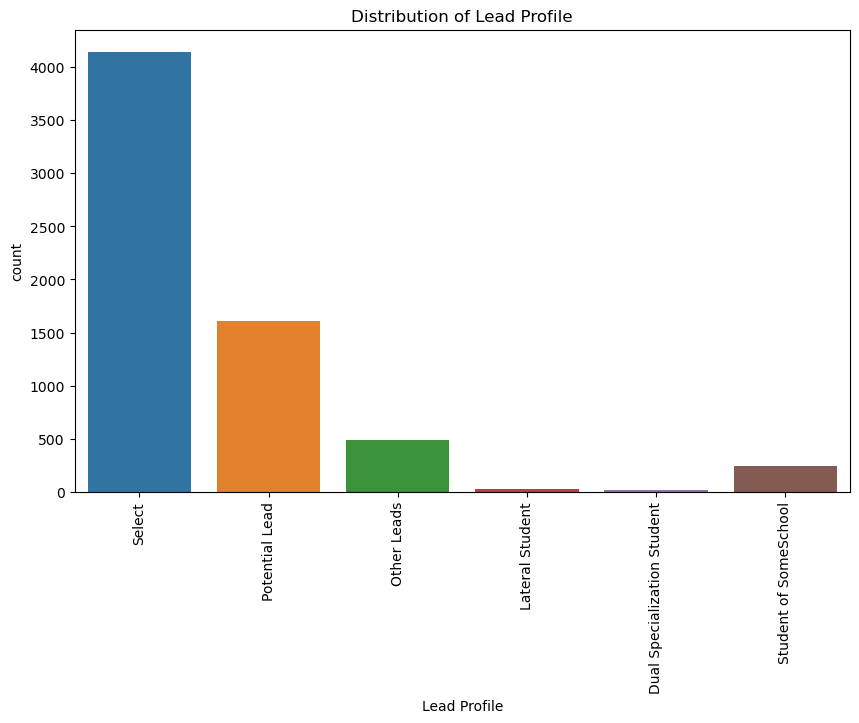

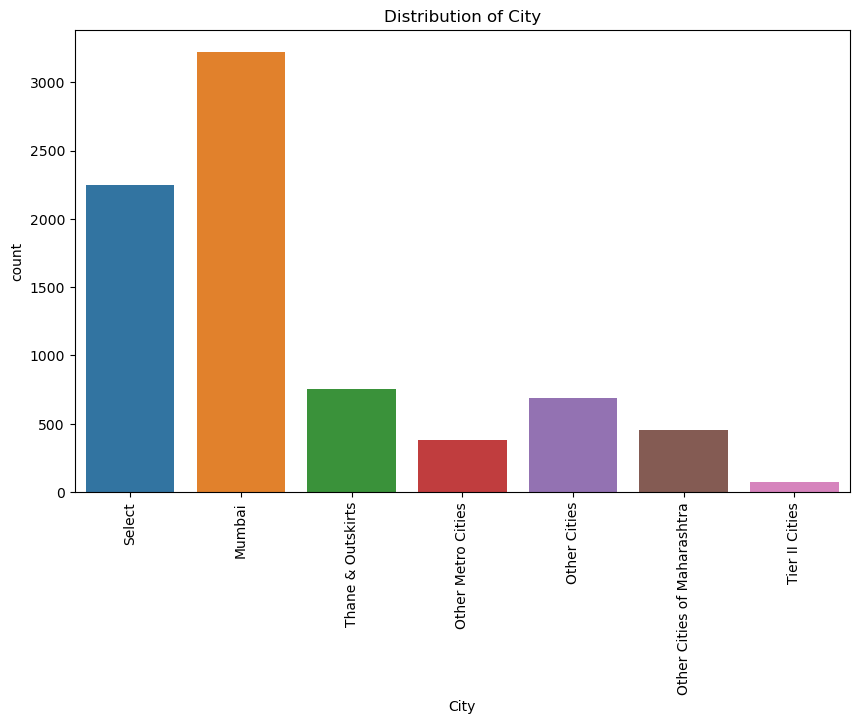

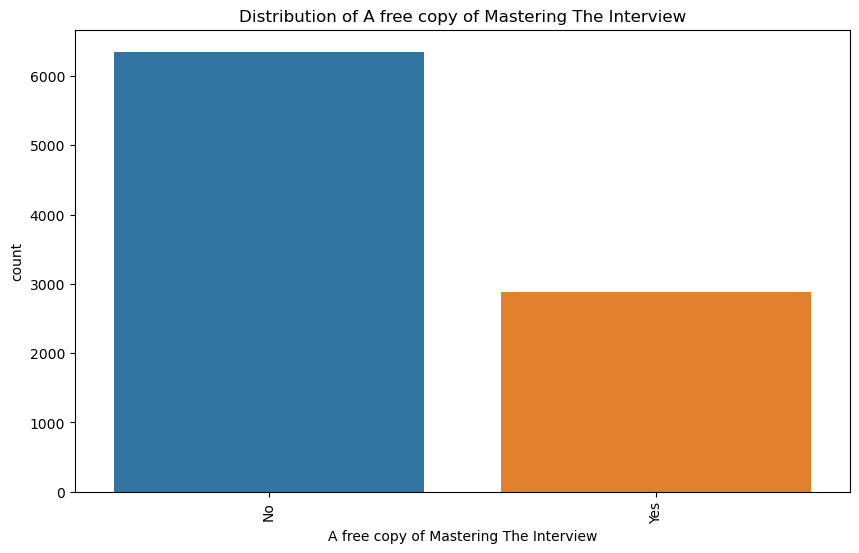

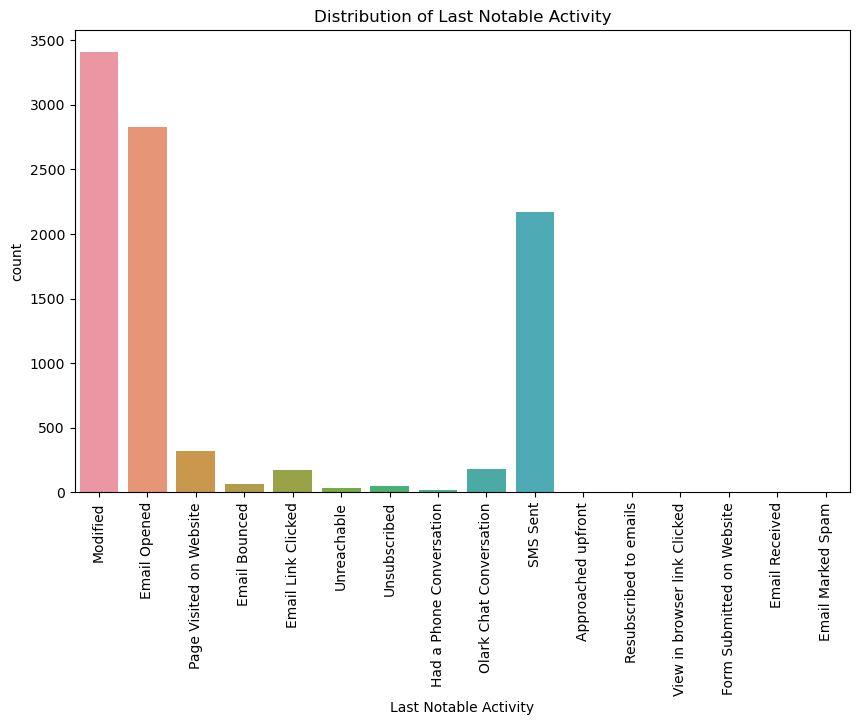

In [27]:
# Checking the value distribution for each of the column

for column in lead_df.columns:
    plt.figure(figsize=(10, 6))
    
    if lead_df[column].dtype == 'object':  # Categorical columns
        sns.countplot(data=lead_df, x=column)
    else:  # Numerical columns
        sns.histplot(data=lead_df, x=column, kde=True)
    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [28]:
#Checking the counf of Select value for each of the columns

target_value = 'Select'

# Initialize a dictionary to store counts for each column
value_counts_dict = {}

# Loop through each column and calculate the count for the target value
for column in lead_df.columns:
    count = lead_df[column].value_counts().get(target_value, 0)  # Get count or 0 if value not present
    value_counts_dict[column] = count

# Print the counts for each column
for column, count in value_counts_dict.items():
    print(f"Count of '{target_value}' in '{column}': {count}")

Count of 'Select' in 'Lead Origin': 0
Count of 'Select' in 'Converted': 0
Count of 'Select' in 'TotalVisits': 0
Count of 'Select' in 'Total Time Spent on Website': 0
Count of 'Select' in 'Page Views Per Visit': 0
Count of 'Select' in 'Last Activity': 0
Count of 'Select' in 'Country': 0
Count of 'Select' in 'Specialization': 1942
Count of 'Select' in 'How did you hear about X Education': 5043
Count of 'Select' in 'What is your current occupation': 0
Count of 'Select' in 'Tags': 0
Count of 'Select' in 'Lead Profile': 4146
Count of 'Select' in 'City': 2249
Count of 'Select' in 'A free copy of Mastering The Interview': 0
Count of 'Select' in 'Last Notable Activity': 0


In [29]:
# In the above line we can see 4columns have a high number of select values which can be considered as null values
# Since select value can be considered as null value therefore replacing Select with null value
value_to_replace = 'Select'

# List of columns which has Select values
columns_to_replace = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# Replace the value with NaN in the specified columns
lead_df[columns_to_replace] = lead_df[columns_to_replace].replace(value_to_replace, pd.NA)

In [30]:
# Now after replacing the Select with null values checking the count of null values in each column
lead_df.isnull().sum()

Lead Origin                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Tags                                      3353
Lead Profile                              6855
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [31]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Profile                              74.188312
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [32]:
#Checking for the column having null values more than 40%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>40]

How did you hear about X Education    78.463203
Lead Profile                          74.188312
dtype: float64

In [33]:
#Taking the list of the columns having null values more than 40%
null_values_list = null_percentage[null_percentage>40].index.tolist()

In [34]:
# Dropping the column having null values more than 40%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [35]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

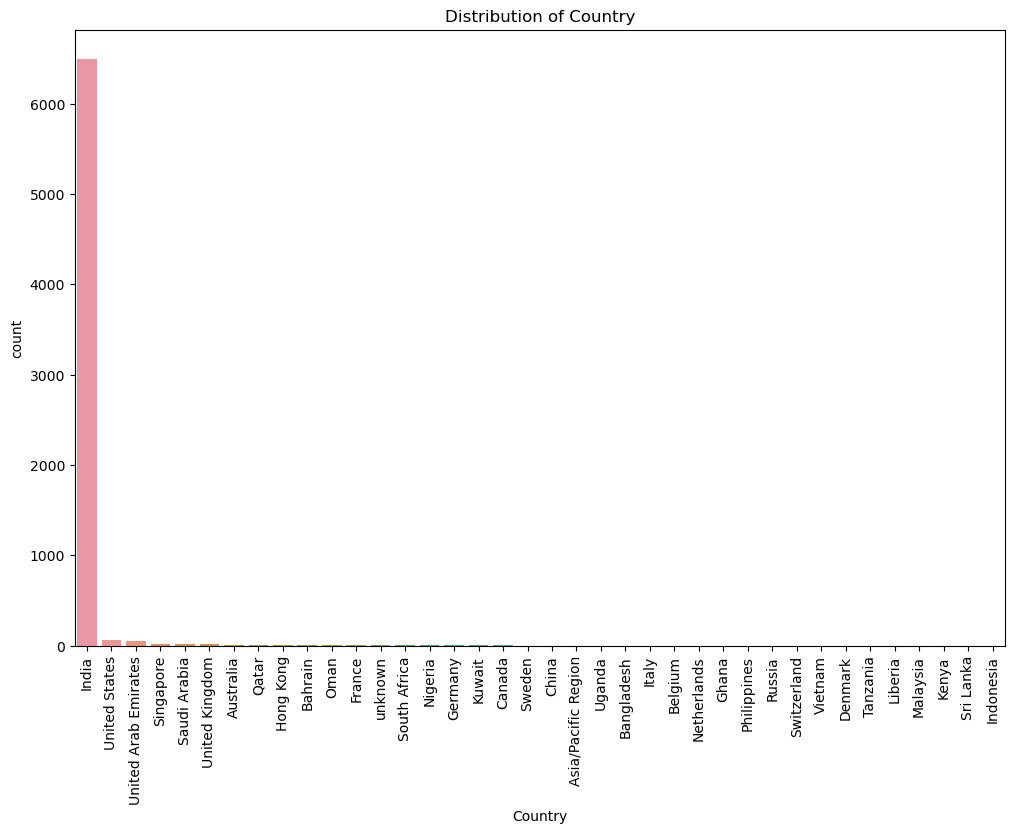

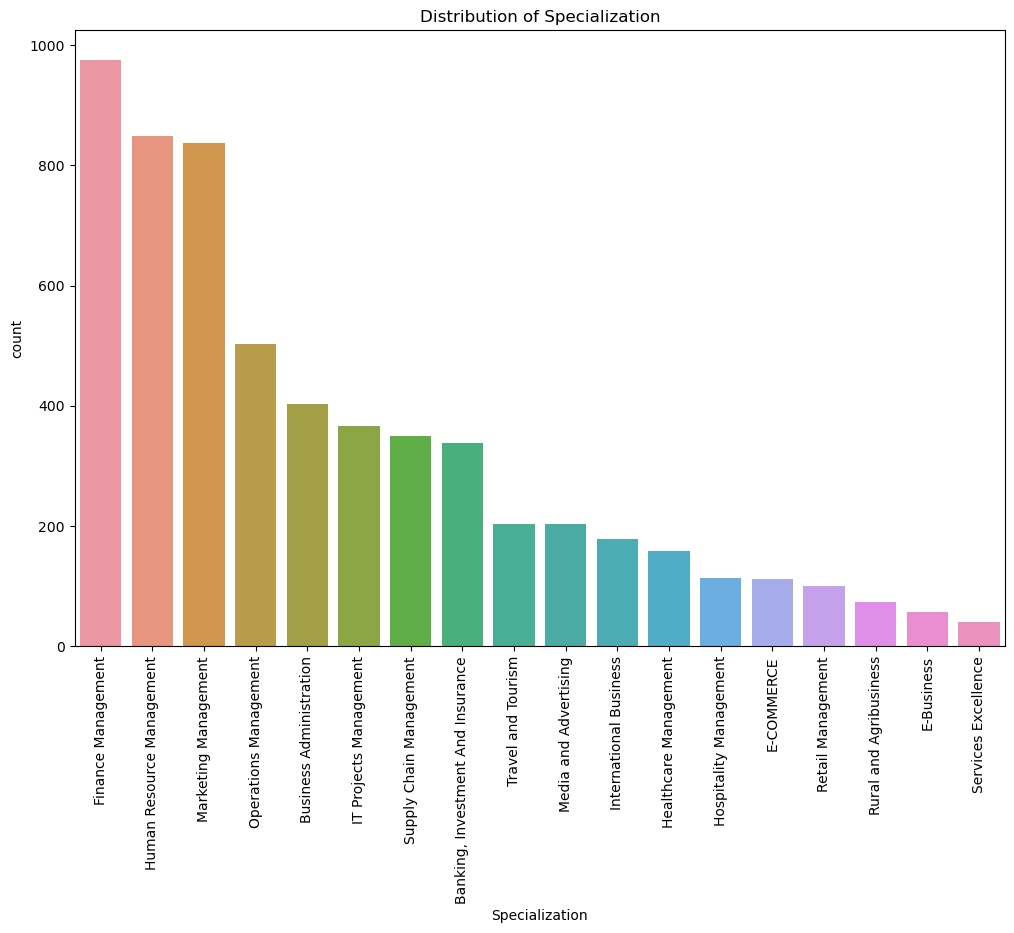

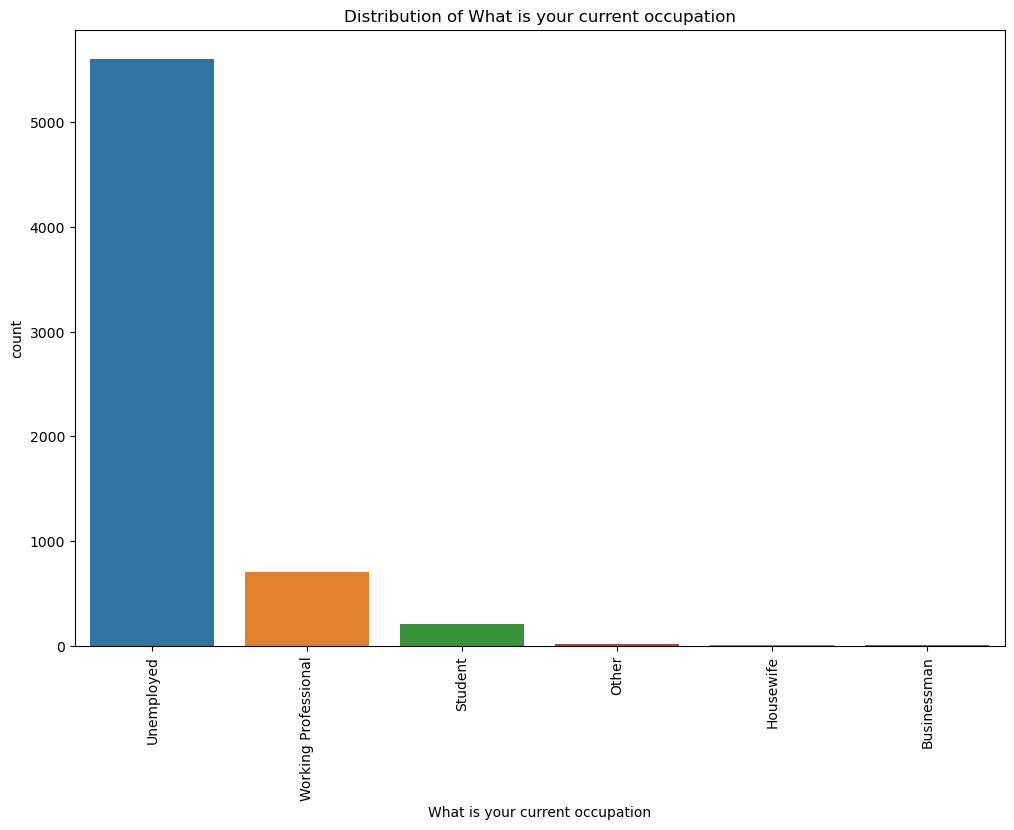

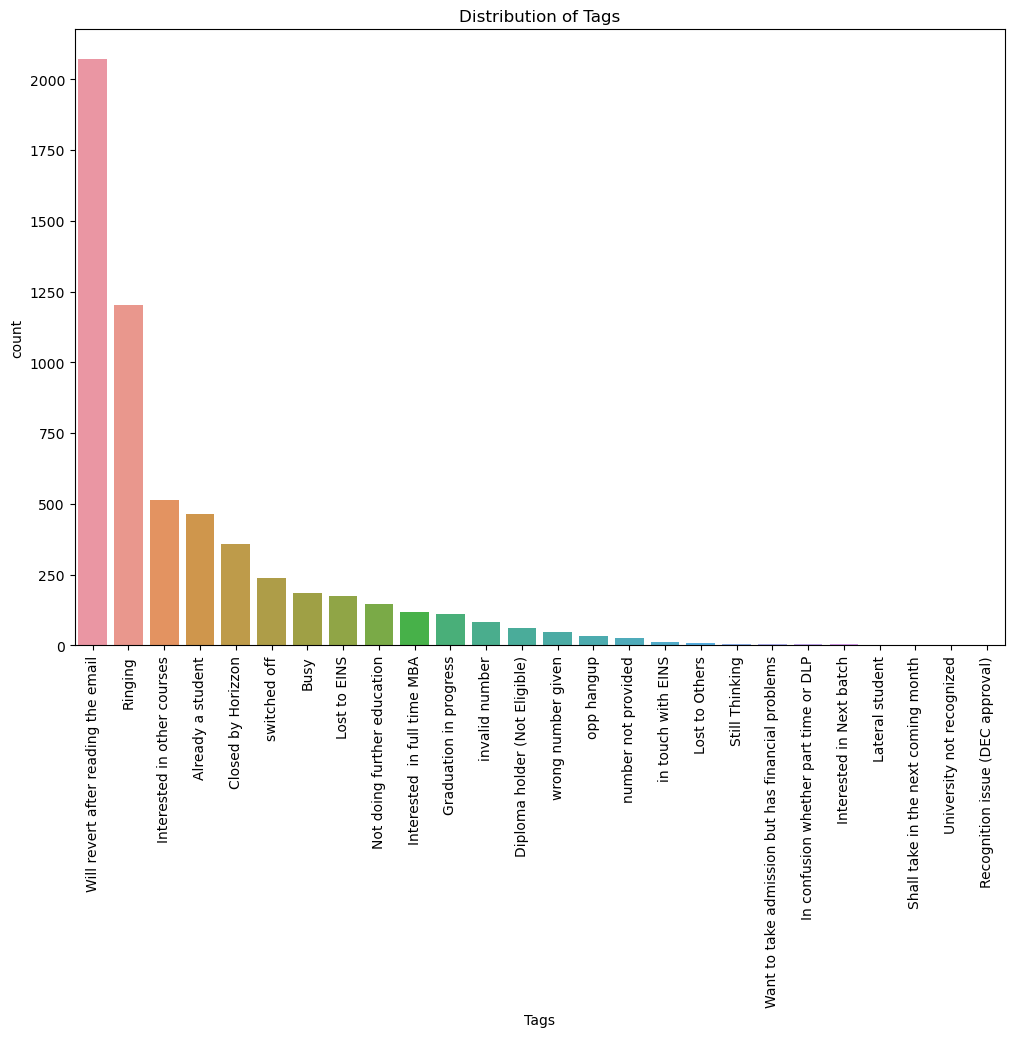

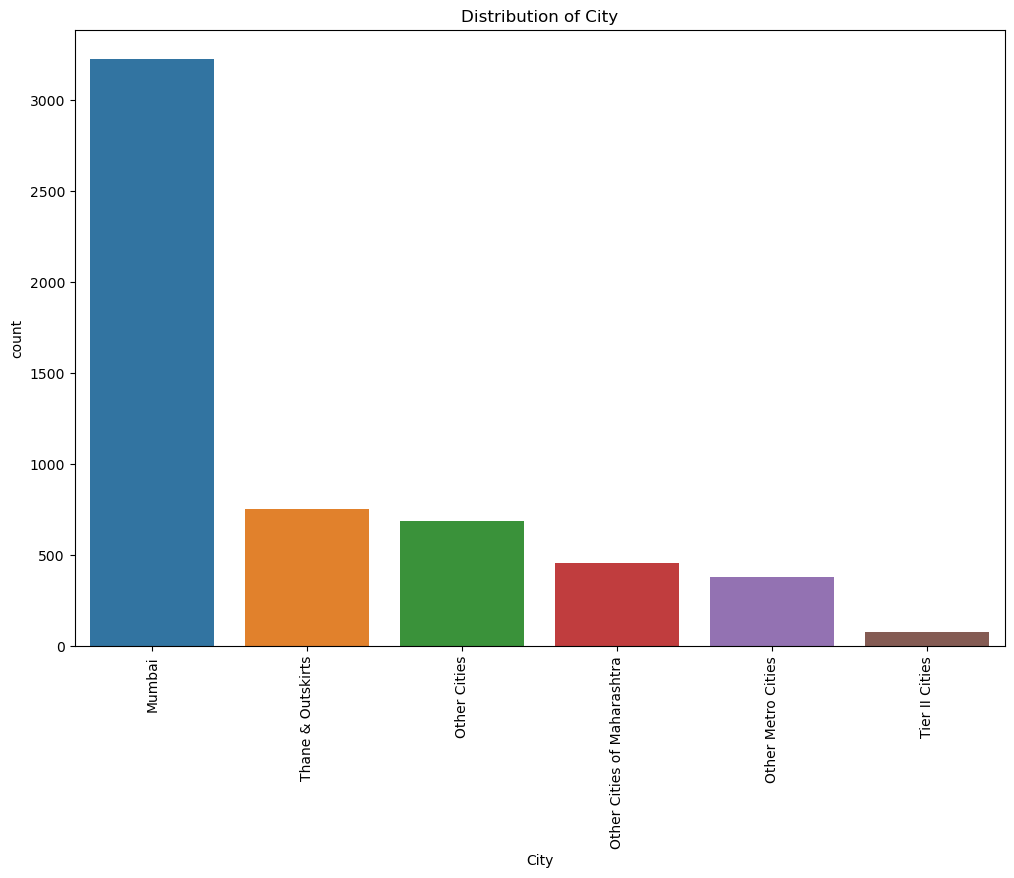

In [36]:
# Checking the values distribution of Country, Specilization, What is your current occupation, Tags and City
value_dist_def = ['Country', 'Specialization', 'What is your current occupation','Tags','City']
for column in value_dist_def:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=lead_df, x=column, order=lead_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [37]:
# Since these 4 columns have relatively high percentage of missing values dropping the rows will result in loosing huge amount of data.
# Therefore replacing the null values with the Mode of the data.

# List of columns with null values to replace
columns_to_replace = ['Country', 'Specialization', 'What is your current occupation','Tags','City']

# Loop through each column and replace null values with mode
for column in columns_to_replace:
    mode_value = lead_df[column].mode()[0]  # Get the mode value
    lead_df[column].fillna(mode_value, inplace=True)

In [38]:
# Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [39]:
# Since columns 'TotalVisits', 'Page Views Per Visit', 'Last Activity' has low null value percentage therefore dropping these rows.
# Dropping these will not result in dropping big crunch of data.

# Drop rows with null values in specific columns
columns_to_check = ['TotalVisits', 'Page Views Per Visit', 'Last Activity']
lead_df = lead_df.dropna(subset=columns_to_check)

In [40]:
# Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [41]:
lead_df.shape

(9103, 13)